# Tuning Neural Networks with Regularization - Lab

## Introduction

Recall from the last lab that you had a training accuracy close to 90% and a test set accuracy close to 76%.

As with your previous machine learning work, you should be asking a couple of questions:
- Is there high bias? yes/no
- Is there high variance? yes/no 

In this lab, you'll use the a train-validate-test partition as well as a validation set to get better insights of how to tune neural networks using regularization techniques. You'll start by repeating the process from the last section: importing the data and performing preprocessing including one-hot encoding. From there, you'll define and compile the model like before. However, this time, when you are presented with the `history` dictionary of the model, you will have additional data entries for not only the train and test set but also the validation set.

## Objectives

You will be able to:

* Construct and run a basic model in Keras
* Construct a validation set and explain potential benefits
* Apply L1 and L2 regularization
* Apply dropout regularization
* Observe and comment on the effect of using more data

## Import the libraries

As usual, start by importing some of the packages and modules that you intend to use. The first thing you'll be doing is importing the data and taking a random sample, so that should clue you in to what tools to import. If you need more tools down the line, you can always import additional packages later.

In [1]:
#Your code here; import some packages/modules you plan to use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-darkgrid')

## Load the Data

As with the previous lab, the data is stored in a file **Bank_complaints.csv**. Load and preview the dataset.

In [2]:
#Your code here; load and preview the dataset
df = pd.read_csv('Bank_complaints.csv')
df.head()

,Product,Consumer complaint narrative
0,Student loan,In XX/XX/XXXX I filled out the Fedlaon applica...
1,Student loan,I am being contacted by a debt collector for p...
2,Student loan,I cosigned XXXX student loans at SallieMae for...
3,Student loan,Navient has sytematically and illegally failed...
4,Student loan,My wife became eligible for XXXX Loan Forgiven...


## Preprocessing Overview

Before you begin to practice some of your new tools regarding regularization and optimization, let's practice munging some data as you did in the previous section with bank complaints. Recall some techniques:

* Train - test split
* Sampling in order to reduce training time (investigate model accuracy vs data size later on)
* One-hot encoding your complaint text
* Transforming your category labels

## Preprocessing: Generate a Random Sample

Since you have quite a bit of data and training networks takes a substantial amount of time and resources, downsample in order to test your initial pipeline. Going forward, these can be interesting areas of investigation: how does your models performance change as you increase (or decrease) the size of your dataset?  

Generate the random sample using seed 123 for consistency of results. Make your new sample have 10,000 observations.

In [3]:
#Your code here
sample = df.sample(10000, random_state=123)

## Train-test Split

Below, perform an appropriate train test split.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = sample['Consumer complaint narrative']
y = sample['Product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Running the model using a validation set.

## Creating the Validation Set

In the lecture, you saw that in deep learning, you generally set aside a validation set, which is then used during hyperparameter tuning. Afterwards, when you have decided upon a final model, the test can then be used to define the final model perforance. 

In this example, take the first 1000 cases out of the training set to create a validation set. You should do this for both `train` and `label_train`.

In [6]:
#Just run this block of code 

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=1000, random_state=123)

## Preprocessing: One-hot Encoding of the Complaints

As before, you need to do some preprocessing and data manipulationg before building the neural network. 

Keep the 2,000 most common words and use one-hot encoding to reformat the complaints into a matrix of vectors.

In [7]:
#Your code here; use one-hot encoding to reformat the complaints into a matrix of vectors.
#Only keep the 2000 most common words.
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final)

X_train_tok = tokenizer.texts_to_matrix(X_train_final, mode='binary')
X_val = tokenizer.texts_to_matrix(X_val, mode='binary')

## Preprocessing: Encoding the Products

Similarly, now transform the descriptive product labels to integers labels. After transforming them to integer labels, retransform them into a matrix of binary flags, one for each of the various product labels.  
  
> **Note**: This is similar to your previous work with dummy variables. Each of the various product categories will be its own column, and each observation will be a row. In turn, each of these observation rows will have a 1 in the column associated with it's label, and all other entries for the row will be zero.

In [8]:
#Your code here; transform the product labels to numerical values
#Then transform these integer values into a matrix of binary flags
from sklearn.preprocessing import LabelBinarizer
from keras.utils.np_utils import to_categorical

lb = LabelBinarizer()
lb.fit(y_train_final)

y_train_lb = to_categorical(lb.transform(y_train_final))[:, :, 1]
y_val = to_categorical(lb.transform(y_val))[:, :, 1]

## Creating the Model

Rebuild a fully connected (Dense) layer network with relu activations in Keras.

Recall that you used 2 hidden with 50 units in the first layer and 25 in the second, both with a `relu` activation function. Because you are dealing with a multiclass problem (classifying the complaints into 7 classes), use a softmax classifyer in order to output 7 class probabilities per case. 

In [16]:
#Your code here; build a neural network using Keras as described above.
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

## Compiling the Model
In the compiler, you'll be passing the optimizer, loss function, and metrics. Train the model for 120 epochs in mini-batches of 256 samples. This time, include the argument `validation_data` and assign it `(val, label_val)`

In [17]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

## Training the Model

Ok, now for the resource intensive part: time to train your model! Note that this is where you also introduce the validation data to the model.

In [18]:
#Code provided; note the extra validation parameter passed.
model_val = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/120
28/28 [==============================] - 0s 9ms/step - loss: 1.9601 - accuracy: 0.1389 - val_loss: 1.9428 - val_accuracy: 0.1650
Epoch 2/120
28/28 [==============================] - 0s 4ms/step - loss: 1.9292 - accuracy: 0.1737 - val_loss: 1.9204 - val_accuracy: 0.1840
Epoch 3/120
28/28 [==============================] - 0s 4ms/step - loss: 1.9074 - accuracy: 0.1999 - val_loss: 1.9014 - val_accuracy: 0.2070
Epoch 4/120
28/28 [==============================] - 0s 4ms/step - loss: 1.8874 - accuracy: 0.2276 - val_loss: 1.8822 - val_accuracy: 0.2300
Epoch 5/120
28/28 [==============================] - 0s 4ms/step - loss: 1.8659 - accuracy: 0.2503 - val_loss: 1.8604 - val_accuracy: 0.2520
Epoch 6/120
28/28 [==============================] - 0s 4ms/step - loss: 1.8416 - accuracy: 0.2731 - val_loss: 1.8352 - val_accuracy: 0.2860
Epoch 7/120
28/28 [==============================] - 0s 5ms/step - loss: 1.8137 - accuracy: 0.2986 - val_loss: 1.8056 - val_accuracy: 0.3140
Epoch 8/120
2

Epoch 59/120
28/28 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.8019 - val_loss: 0.7181 - val_accuracy: 0.7380
Epoch 60/120
28/28 [==============================] - 0s 4ms/step - loss: 0.5793 - accuracy: 0.8033 - val_loss: 0.7130 - val_accuracy: 0.7430
Epoch 61/120
28/28 [==============================] - 0s 4ms/step - loss: 0.5740 - accuracy: 0.8021 - val_loss: 0.7123 - val_accuracy: 0.7420
Epoch 62/120
28/28 [==============================] - 0s 4ms/step - loss: 0.5688 - accuracy: 0.8067 - val_loss: 0.7067 - val_accuracy: 0.7450
Epoch 63/120
28/28 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.8074 - val_loss: 0.7061 - val_accuracy: 0.7450
Epoch 64/120
28/28 [==============================] - 0s 4ms/step - loss: 0.5582 - accuracy: 0.8110 - val_loss: 0.7044 - val_accuracy: 0.7420
Epoch 65/120
28/28 [==============================] - 0s 4ms/step - loss: 0.5535 - accuracy: 0.8109 - val_loss: 0.7016 - val_accuracy: 0.7460
Epoch 

28/28 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.8856 - val_loss: 0.6697 - val_accuracy: 0.7600
Epoch 117/120
28/28 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.8854 - val_loss: 0.6724 - val_accuracy: 0.7580
Epoch 118/120
28/28 [==============================] - 0s 4ms/step - loss: 0.3644 - accuracy: 0.8860 - val_loss: 0.6709 - val_accuracy: 0.7630
Epoch 119/120
28/28 [==============================] - 0s 4ms/step - loss: 0.3616 - accuracy: 0.8879 - val_loss: 0.6744 - val_accuracy: 0.7580
Epoch 120/120
28/28 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.8887 - val_loss: 0.6751 - val_accuracy: 0.7540


## Retrieving Performance Results: the `history` dictionary

The dictionary `history` contains four entries this time: one per metric that was being monitored during training and during validation.

In [19]:
model_val_dict = model_val.history
model_val_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
results_train = model.evaluate(X_train_tok, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

219/219 [==============================] - 0s 889us/step - loss: 0.3565 - accuracy: 0.8910
Training Loss: 0.356 Training Accuracy: 0.891


## Preprocess then evaluate our models performance on the test set

In [21]:
X_test_tok = tokenizer.texts_to_matrix(X_test, mode='binary')
y_test_cat = to_categorical(lb.transform(y_test))[:, :, 1]

results_test = model.evaluate(X_test_tok, y_test_cat)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')

63/63 [==============================] - 0s 984us/step - loss: 0.6347 - accuracy: 0.7680
Testing Loss: 0.635 Testing Accuracy: 0.768


In [22]:
model.metrics_names

['loss', 'accuracy']

The first element of the list returned by `model.evaluate` is the loss, and the second is the accuracy score. 

Note that the result you obtained here isn't exactly the same as before. This is because the training set is slightly different! You removed 1000 instances for validation!

## Plotting the Results

Plot the loss function versus the number of epochs. Be sure to include the training and the validation loss in the same plot. Then, create a second plot comparing training and validation accuracy to the number of epochs.

In [28]:
plt.style.use('seaborn-darkgrid')

In [29]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

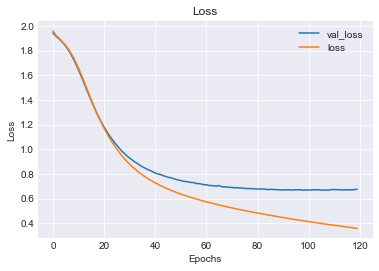

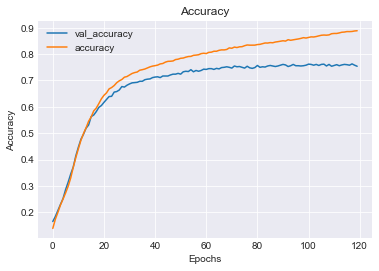

In [30]:
# Loss vs number of epochs with train and val set
visualize_training_results(model_val)

Notice an interesting pattern here: although the training accuracy keeps increasing when going through more epochs, and the training loss keeps decreasing, the validation accuracy and loss seem to be reaching a limit around the 60th epoch. This means that you're probably **overfitting** the model to the training data when you train for many epochs past this dropoff point of around 40 epochs. Luckily, you learned how to tackle overfitting in the previous lecture! Since it seems clear that you are training too long, include early stopping at the 60th epoch first.

## Early Stopping

Below, observe how to update the model to include an earlier cutoff point:

In [32]:
import random
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

final_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=60,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/60
28/28 [==============================] - 0s 8ms/step - loss: 1.9613 - accuracy: 0.1479 - val_loss: 1.9608 - val_accuracy: 0.1490
Epoch 2/60
28/28 [==============================] - 0s 5ms/step - loss: 1.9458 - accuracy: 0.1607 - val_loss: 1.9494 - val_accuracy: 0.1550
Epoch 3/60
28/28 [==============================] - 0s 4ms/step - loss: 1.9343 - accuracy: 0.1799 - val_loss: 1.9400 - val_accuracy: 0.1620
Epoch 4/60
28/28 [==============================] - 0s 4ms/step - loss: 1.9234 - accuracy: 0.1959 - val_loss: 1.9297 - val_accuracy: 0.1840
Epoch 5/60
28/28 [==============================] - 0s 5ms/step - loss: 1.9114 - accuracy: 0.2141 - val_loss: 1.9181 - val_accuracy: 0.2070
Epoch 6/60
28/28 [==============================] - 0s 5ms/step - loss: 1.8972 - accuracy: 0.2399 - val_loss: 1.9046 - val_accuracy: 0.2300
Epoch 7/60
28/28 [==============================] - 0s 5ms/step - loss: 1.8803 - accuracy: 0.2639 - val_loss: 1.8892 - val_accuracy: 0.2460
Epoch 8/60
28/28 [==

28/28 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.7790 - val_loss: 0.7592 - val_accuracy: 0.7180
Epoch 60/60
28/28 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.7811 - val_loss: 0.7577 - val_accuracy: 0.7220


Now, you can use the test set to make label predictions

In [33]:
results_train = model.evaluate(X_train_tok, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

results_test = model.evaluate(X_test_tok, y_test_cat)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')

219/219 [==============================] - 0s 956us/step - loss: 0.6230 - accuracy: 0.7861
Training Loss: 0.623 Training Accuracy: 0.786
63/63 [==============================] - 0s 979us/step - loss: 0.6889 - accuracy: 0.7480
Testing Loss: 0.689 Testing Accuracy: 0.748


We've significantly reduced the variance, so this is already pretty good! your test set accuracy is slightly worse, but this model will definitely be more robust than the 120 epochs model you originally fit.

Now, take a look at how regularization techniques can further improve your model performance.

## L2 Regularization

First, take a look at L2 regularization. Keras makes L2 regularization easy. Simply add the `kernel_regularizer=keras.regularizers.l2(lambda_coeff)` parameter to any model layer. The `lambda_coeff` parameter determines the strength of the regularization you wish to perform.

In [34]:
from keras import regularizers
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L2_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/120
28/28 [==============================] - 0s 9ms/step - loss: 2.6097 - accuracy: 0.1199 - val_loss: 2.5968 - val_accuracy: 0.1400
Epoch 2/120
28/28 [==============================] - 0s 5ms/step - loss: 2.5861 - accuracy: 0.1636 - val_loss: 2.5797 - val_accuracy: 0.1700
Epoch 3/120
28/28 [==============================] - 0s 4ms/step - loss: 2.5701 - accuracy: 0.1990 - val_loss: 2.5655 - val_accuracy: 0.2010
Epoch 4/120
28/28 [==============================] - 0s 4ms/step - loss: 2.5557 - accuracy: 0.2286 - val_loss: 2.5520 - val_accuracy: 0.2150
Epoch 5/120
28/28 [==============================] - 0s 5ms/step - loss: 2.5408 - accuracy: 0.2464 - val_loss: 2.5373 - val_accuracy: 0.2300
Epoch 6/120
28/28 [==============================] - 0s 5ms/step - loss: 2.5243 - accuracy: 0.2646 - val_loss: 2.5207 - val_accuracy: 0.2490
Epoch 7/120
28/28 [==============================] - 0s 5ms/step - loss: 2.5048 - accuracy: 0.2767 - val_loss: 2.5007 - val_accuracy: 0.2630
Epoch 8/120
2

Epoch 59/120
28/28 [==============================] - 0s 4ms/step - loss: 1.1966 - accuracy: 0.7876 - val_loss: 1.2843 - val_accuracy: 0.7210
Epoch 60/120
28/28 [==============================] - 0s 4ms/step - loss: 1.1886 - accuracy: 0.7867 - val_loss: 1.2777 - val_accuracy: 0.7270
Epoch 61/120
28/28 [==============================] - 0s 4ms/step - loss: 1.1802 - accuracy: 0.7910 - val_loss: 1.2742 - val_accuracy: 0.7200
Epoch 62/120
28/28 [==============================] - 0s 4ms/step - loss: 1.1732 - accuracy: 0.7909 - val_loss: 1.2666 - val_accuracy: 0.7250
Epoch 63/120
28/28 [==============================] - 0s 4ms/step - loss: 1.1656 - accuracy: 0.7933 - val_loss: 1.2620 - val_accuracy: 0.7280
Epoch 64/120
28/28 [==============================] - 0s 4ms/step - loss: 1.1581 - accuracy: 0.7944 - val_loss: 1.2565 - val_accuracy: 0.7240
Epoch 65/120
28/28 [==============================] - 0s 4ms/step - loss: 1.1509 - accuracy: 0.7959 - val_loss: 1.2504 - val_accuracy: 0.7310
Epoch 

28/28 [==============================] - 0s 4ms/step - loss: 0.8947 - accuracy: 0.8663 - val_loss: 1.1103 - val_accuracy: 0.7640
Epoch 117/120
28/28 [==============================] - 0s 4ms/step - loss: 0.8907 - accuracy: 0.8704 - val_loss: 1.1071 - val_accuracy: 0.7690
Epoch 118/120
28/28 [==============================] - 0s 4ms/step - loss: 0.8866 - accuracy: 0.8716 - val_loss: 1.1067 - val_accuracy: 0.7730
Epoch 119/120
28/28 [==============================] - 0s 4ms/step - loss: 0.8830 - accuracy: 0.8736 - val_loss: 1.1032 - val_accuracy: 0.7670
Epoch 120/120
28/28 [==============================] - 0s 4ms/step - loss: 0.8796 - accuracy: 0.8726 - val_loss: 1.1023 - val_accuracy: 0.7690


In [35]:
L2_model_dict = L2_model.history
L2_model_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Now, look at the training accuracy as well as the validation accuracy for both the L2 and the model without regularization (for 120 epochs).

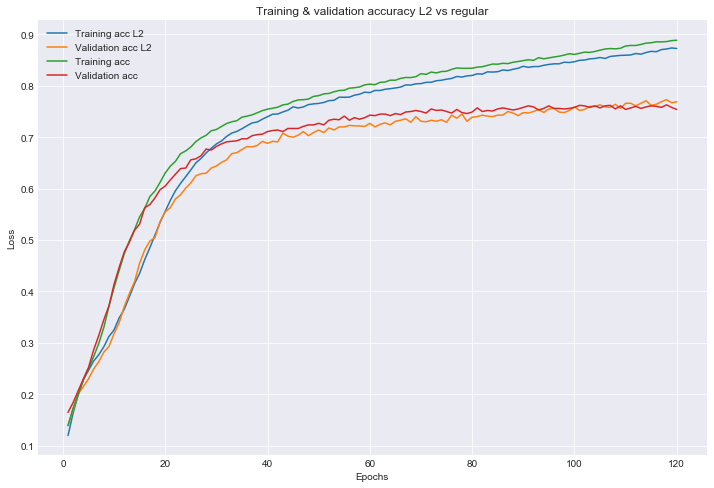

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))

acc_values = L2_model_dict['accuracy'] 
val_acc_values = L2_model_dict['val_accuracy']
model_acc = model_val_dict['accuracy']
model_val_acc = model_val_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc L2')
ax.plot(epochs, val_acc_values, label='Validation acc L2')
ax.plot(epochs, model_acc, label='Training acc')
ax.plot(epochs, model_val_acc, label='Validation acc')
ax.set_title('Training & validation accuracy L2 vs regular')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

The results of L2 regularization are quite disappointing here. Notice the discrepancy between validation and training accuracy seems to have decreased slightly, but the end result is definitely not getting better. 

## L1 Regularization

Have a look at L1 regularization. Will this work better?

In [37]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L1_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/120
28/28 [==============================] - 0s 9ms/step - loss: 16.0503 - accuracy: 0.1519 - val_loss: 15.6761 - val_accuracy: 0.1390
Epoch 2/120
28/28 [==============================] - 0s 5ms/step - loss: 15.3395 - accuracy: 0.1586 - val_loss: 14.9793 - val_accuracy: 0.1440
Epoch 3/120
28/28 [==============================] - 0s 4ms/step - loss: 14.6555 - accuracy: 0.1646 - val_loss: 14.3065 - val_accuracy: 0.1530
Epoch 4/120
28/28 [==============================] - 0s 5ms/step - loss: 13.9927 - accuracy: 0.1723 - val_loss: 13.6540 - val_accuracy: 0.1600
Epoch 5/120
28/28 [==============================] - 0s 4ms/step - loss: 13.3484 - accuracy: 0.1799 - val_loss: 13.0193 - val_accuracy: 0.1700
Epoch 6/120
28/28 [==============================] - 0s 4ms/step - loss: 12.7216 - accuracy: 0.1919 - val_loss: 12.4021 - val_accuracy: 0.1800
Epoch 7/120
28/28 [==============================] - 0s 4ms/step - loss: 12.1126 - accuracy: 0.2051 - val_loss: 11.8022 - val_accuracy: 0.1980

28/28 [==============================] - 0s 4ms/step - loss: 1.8693 - accuracy: 0.6500 - val_loss: 1.8734 - val_accuracy: 0.6400
Epoch 59/120
28/28 [==============================] - 0s 4ms/step - loss: 1.8568 - accuracy: 0.6537 - val_loss: 1.8599 - val_accuracy: 0.6370
Epoch 60/120
28/28 [==============================] - 0s 5ms/step - loss: 1.8447 - accuracy: 0.6551 - val_loss: 1.8463 - val_accuracy: 0.6420
Epoch 61/120
28/28 [==============================] - 0s 5ms/step - loss: 1.8320 - accuracy: 0.6584 - val_loss: 1.8336 - val_accuracy: 0.6420
Epoch 62/120
28/28 [==============================] - 0s 5ms/step - loss: 1.8207 - accuracy: 0.6571 - val_loss: 1.8232 - val_accuracy: 0.6470
Epoch 63/120
28/28 [==============================] - 0s 4ms/step - loss: 1.8086 - accuracy: 0.6601 - val_loss: 1.8114 - val_accuracy: 0.6420
Epoch 64/120
28/28 [==============================] - 0s 4ms/step - loss: 1.7973 - accuracy: 0.6627 - val_loss: 1.8008 - val_accuracy: 0.6410
Epoch 65/120
28/28 

Epoch 116/120
28/28 [==============================] - 0s 4ms/step - loss: 1.4012 - accuracy: 0.7033 - val_loss: 1.4282 - val_accuracy: 0.6720
Epoch 117/120
28/28 [==============================] - 0s 4ms/step - loss: 1.3962 - accuracy: 0.7021 - val_loss: 1.4204 - val_accuracy: 0.6770
Epoch 118/120
28/28 [==============================] - 0s 4ms/step - loss: 1.3911 - accuracy: 0.7043 - val_loss: 1.4175 - val_accuracy: 0.6720
Epoch 119/120
28/28 [==============================] - 0s 4ms/step - loss: 1.3856 - accuracy: 0.7044 - val_loss: 1.4157 - val_accuracy: 0.6770
Epoch 120/120
28/28 [==============================] - 0s 4ms/step - loss: 1.3807 - accuracy: 0.7063 - val_loss: 1.4080 - val_accuracy: 0.6760


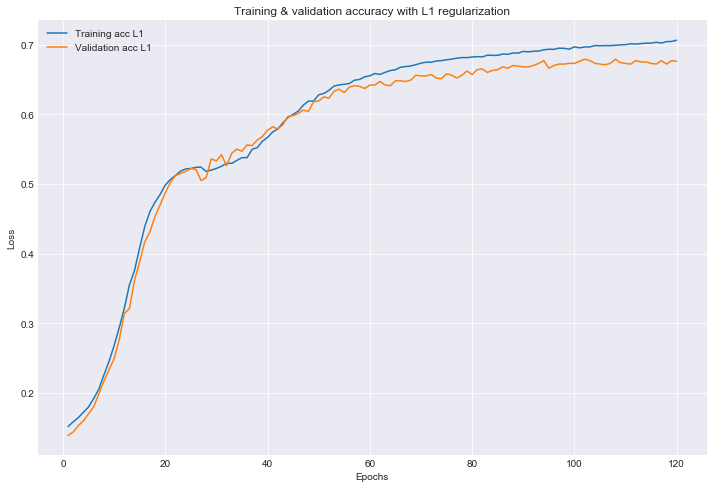

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

L1_model_dict = L1_model.history

acc_values = L1_model_dict['accuracy'] 
val_acc_values = L1_model_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc L1')
ax.plot(epochs, val_acc_values, label='Validation acc L1')
ax.set_title('Training & validation accuracy with L1 regularization')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

Notice how the training and validation accuracy don't diverge as much as before. Unfortunately, the validation accuracy doesn't reach rates much higher than 70%. It does seem like you can still improve the model by training much longer.

In [39]:
# ⏰ This cell may take several minutes to run
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L1_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=1000,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/1000
28/28 [==============================] - 0s 9ms/step - loss: 16.0344 - accuracy: 0.1733 - val_loss: 15.6523 - val_accuracy: 0.1900
Epoch 2/1000
28/28 [==============================] - 0s 5ms/step - loss: 15.3170 - accuracy: 0.2073 - val_loss: 14.9512 - val_accuracy: 0.2130
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 14.6250 - accuracy: 0.2289 - val_loss: 14.2702 - val_accuracy: 0.2320
Epoch 4/1000
28/28 [==============================] - 0s 4ms/step - loss: 13.9510 - accuracy: 0.2410 - val_loss: 13.6052 - val_accuracy: 0.2440
Epoch 5/1000
28/28 [==============================] - 0s 5ms/step - loss: 13.2924 - accuracy: 0.2547 - val_loss: 12.9550 - val_accuracy: 0.2670
Epoch 6/1000
28/28 [==============================] - 0s 4ms/step - loss: 12.6488 - accuracy: 0.2856 - val_loss: 12.3214 - val_accuracy: 0.2820
Epoch 7/1000
28/28 [==============================] - 0s 5ms/step - loss: 12.0227 - accuracy: 0.3121 - val_loss: 11.7065 - val_accuracy:

28/28 [==============================] - 0s 4ms/step - loss: 1.7835 - accuracy: 0.6944 - val_loss: 1.7870 - val_accuracy: 0.6690
Epoch 59/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7724 - accuracy: 0.6959 - val_loss: 1.7766 - val_accuracy: 0.6770
Epoch 60/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7617 - accuracy: 0.6967 - val_loss: 1.7689 - val_accuracy: 0.6640
Epoch 61/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7516 - accuracy: 0.6983 - val_loss: 1.7597 - val_accuracy: 0.6660
Epoch 62/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7418 - accuracy: 0.6964 - val_loss: 1.7495 - val_accuracy: 0.6690
Epoch 63/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7317 - accuracy: 0.6979 - val_loss: 1.7370 - val_accuracy: 0.6760
Epoch 64/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7223 - accuracy: 0.6973 - val_loss: 1.7271 - val_accuracy: 0.6710
Epoch 65/1000

28/28 [==============================] - 0s 4ms/step - loss: 1.3724 - accuracy: 0.7181 - val_loss: 1.4016 - val_accuracy: 0.6900
Epoch 116/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3676 - accuracy: 0.7190 - val_loss: 1.3942 - val_accuracy: 0.6930
Epoch 117/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3623 - accuracy: 0.7183 - val_loss: 1.3922 - val_accuracy: 0.6910
Epoch 118/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3576 - accuracy: 0.7189 - val_loss: 1.3824 - val_accuracy: 0.6950
Epoch 119/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3527 - accuracy: 0.7186 - val_loss: 1.3795 - val_accuracy: 0.6920
Epoch 120/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3480 - accuracy: 0.7199 - val_loss: 1.3745 - val_accuracy: 0.6890
Epoch 121/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3428 - accuracy: 0.7204 - val_loss: 1.3730 - val_accuracy: 0.6910
Epoch 1

Epoch 172/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1570 - accuracy: 0.7379 - val_loss: 1.1982 - val_accuracy: 0.7020
Epoch 173/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1543 - accuracy: 0.7377 - val_loss: 1.2077 - val_accuracy: 0.6940
Epoch 174/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1521 - accuracy: 0.7361 - val_loss: 1.2022 - val_accuracy: 0.6940
Epoch 175/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1496 - accuracy: 0.7374 - val_loss: 1.1964 - val_accuracy: 0.6990
Epoch 176/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1469 - accuracy: 0.7386 - val_loss: 1.1941 - val_accuracy: 0.7060
Epoch 177/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1444 - accuracy: 0.7377 - val_loss: 1.1901 - val_accuracy: 0.7050
Epoch 178/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1415 - accuracy: 0.7386 - val_loss: 1.1931 - val_accuracy:

Epoch 229/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0578 - accuracy: 0.7483 - val_loss: 1.1219 - val_accuracy: 0.7060
Epoch 230/1000
28/28 [==============================] - ETA: 0s - loss: 1.0644 - accuracy: 0.74 - 0s 4ms/step - loss: 1.0557 - accuracy: 0.7506 - val_loss: 1.1162 - val_accuracy: 0.7120
Epoch 231/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0544 - accuracy: 0.7516 - val_loss: 1.1145 - val_accuracy: 0.7140
Epoch 232/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0538 - accuracy: 0.7517 - val_loss: 1.1193 - val_accuracy: 0.7030
Epoch 233/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0522 - accuracy: 0.7504 - val_loss: 1.1183 - val_accuracy: 0.7000
Epoch 234/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0514 - accuracy: 0.7507 - val_loss: 1.1204 - val_accuracy: 0.7040
Epoch 235/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0495 - accuracy:

28/28 [==============================] - 0s 4ms/step - loss: 1.0031 - accuracy: 0.7569 - val_loss: 1.0734 - val_accuracy: 0.7200
Epoch 286/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0017 - accuracy: 0.7599 - val_loss: 1.0779 - val_accuracy: 0.7100
Epoch 287/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0006 - accuracy: 0.7597 - val_loss: 1.0788 - val_accuracy: 0.7120
Epoch 288/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0002 - accuracy: 0.7579 - val_loss: 1.0792 - val_accuracy: 0.7110
Epoch 289/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9997 - accuracy: 0.7591 - val_loss: 1.0727 - val_accuracy: 0.7190
Epoch 290/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9987 - accuracy: 0.7601 - val_loss: 1.0707 - val_accuracy: 0.7210
Epoch 291/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9979 - accuracy: 0.7589 - val_loss: 1.0790 - val_accuracy: 0.7140
Epoch 2

Epoch 342/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9629 - accuracy: 0.7661 - val_loss: 1.0525 - val_accuracy: 0.7210
Epoch 343/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.9616 - accuracy: 0.7653 - val_loss: 1.0505 - val_accuracy: 0.7120
Epoch 344/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.9617 - accuracy: 0.7676 - val_loss: 1.0466 - val_accuracy: 0.7190
Epoch 345/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.9609 - accuracy: 0.7666 - val_loss: 1.0642 - val_accuracy: 0.7140
Epoch 346/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.9604 - accuracy: 0.7679 - val_loss: 1.0433 - val_accuracy: 0.7240
Epoch 347/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.9598 - accuracy: 0.7677 - val_loss: 1.0475 - val_accuracy: 0.7210
Epoch 348/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.9599 - accuracy: 0.7647 - val_loss: 1.0456 - val_accuracy:

Epoch 399/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.9336 - accuracy: 0.7733 - val_loss: 1.0261 - val_accuracy: 0.7240
Epoch 400/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9336 - accuracy: 0.7719 - val_loss: 1.0276 - val_accuracy: 0.7180
Epoch 401/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9323 - accuracy: 0.7709 - val_loss: 1.0270 - val_accuracy: 0.7280
Epoch 402/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9322 - accuracy: 0.7697 - val_loss: 1.0259 - val_accuracy: 0.7260
Epoch 403/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.9310 - accuracy: 0.7734 - val_loss: 1.0317 - val_accuracy: 0.7210
Epoch 404/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9318 - accuracy: 0.7703 - val_loss: 1.0262 - val_accuracy: 0.7240
Epoch 405/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.9309 - accuracy: 0.7710 - val_loss: 1.0274 - val_accuracy:

Epoch 456/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9099 - accuracy: 0.7770 - val_loss: 1.0140 - val_accuracy: 0.7190
Epoch 457/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9113 - accuracy: 0.7769 - val_loss: 1.0183 - val_accuracy: 0.7210
Epoch 458/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9097 - accuracy: 0.7761 - val_loss: 1.0129 - val_accuracy: 0.7210
Epoch 459/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9096 - accuracy: 0.7764 - val_loss: 1.0142 - val_accuracy: 0.7250
Epoch 460/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9086 - accuracy: 0.7769 - val_loss: 1.0125 - val_accuracy: 0.7190
Epoch 461/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9082 - accuracy: 0.7780 - val_loss: 1.0107 - val_accuracy: 0.7200
Epoch 462/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.9082 - accuracy: 0.7759 - val_loss: 1.0168 - val_accuracy:

Epoch 513/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8919 - accuracy: 0.7800 - val_loss: 1.0064 - val_accuracy: 0.7210
Epoch 514/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8912 - accuracy: 0.7799 - val_loss: 1.0150 - val_accuracy: 0.7210
Epoch 515/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8910 - accuracy: 0.7793 - val_loss: 1.0048 - val_accuracy: 0.7250
Epoch 516/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8901 - accuracy: 0.7799 - val_loss: 1.0053 - val_accuracy: 0.7260
Epoch 517/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8901 - accuracy: 0.7831 - val_loss: 1.0101 - val_accuracy: 0.7200
Epoch 518/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8917 - accuracy: 0.7794 - val_loss: 1.0112 - val_accuracy: 0.7190
Epoch 519/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8903 - accuracy: 0.7807 - val_loss: 1.0090 - val_accuracy:

Epoch 570/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8796 - accuracy: 0.7833 - val_loss: 0.9959 - val_accuracy: 0.7140
Epoch 571/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8776 - accuracy: 0.7809 - val_loss: 1.0133 - val_accuracy: 0.7240
Epoch 572/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8764 - accuracy: 0.7847 - val_loss: 0.9894 - val_accuracy: 0.7240
Epoch 573/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8762 - accuracy: 0.7840 - val_loss: 1.0011 - val_accuracy: 0.7180
Epoch 574/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8760 - accuracy: 0.7840 - val_loss: 0.9960 - val_accuracy: 0.7240
Epoch 575/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8773 - accuracy: 0.7851 - val_loss: 0.9914 - val_accuracy: 0.7220
Epoch 576/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8751 - accuracy: 0.7837 - val_loss: 0.9946 - val_accuracy:

Epoch 627/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8644 - accuracy: 0.7874 - val_loss: 0.9883 - val_accuracy: 0.7220
Epoch 628/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8652 - accuracy: 0.7867 - val_loss: 0.9936 - val_accuracy: 0.7280
Epoch 629/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.8643 - accuracy: 0.7864 - val_loss: 0.9958 - val_accuracy: 0.7220
Epoch 630/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8646 - accuracy: 0.7896 - val_loss: 0.9869 - val_accuracy: 0.7210
Epoch 631/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8644 - accuracy: 0.7867 - val_loss: 1.0000 - val_accuracy: 0.7300
Epoch 632/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8656 - accuracy: 0.7854 - val_loss: 0.9897 - val_accuracy: 0.7200
Epoch 633/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8641 - accuracy: 0.7851 - val_loss: 0.9937 - val_accuracy:

Epoch 684/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8551 - accuracy: 0.7890 - val_loss: 0.9945 - val_accuracy: 0.7330
Epoch 685/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8561 - accuracy: 0.7894 - val_loss: 0.9923 - val_accuracy: 0.7180
Epoch 686/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8554 - accuracy: 0.7924 - val_loss: 0.9959 - val_accuracy: 0.7260
Epoch 687/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8544 - accuracy: 0.7903 - val_loss: 0.9894 - val_accuracy: 0.7230
Epoch 688/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8543 - accuracy: 0.7876 - val_loss: 0.9845 - val_accuracy: 0.7240
Epoch 689/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8566 - accuracy: 0.7910 - val_loss: 0.9933 - val_accuracy: 0.7230
Epoch 690/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8542 - accuracy: 0.7900 - val_loss: 0.9940 - val_accuracy:

Epoch 741/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8474 - accuracy: 0.7956 - val_loss: 0.9912 - val_accuracy: 0.7370
Epoch 742/1000
28/28 [==============================] - ETA: 0s - loss: 0.8458 - accuracy: 0.79 - 0s 4ms/step - loss: 0.8462 - accuracy: 0.7959 - val_loss: 0.9841 - val_accuracy: 0.7300
Epoch 743/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8479 - accuracy: 0.7937 - val_loss: 1.0120 - val_accuracy: 0.7270
Epoch 744/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8453 - accuracy: 0.7960 - val_loss: 1.0102 - val_accuracy: 0.7220
Epoch 745/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8471 - accuracy: 0.7941 - val_loss: 0.9815 - val_accuracy: 0.7310
Epoch 746/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8485 - accuracy: 0.7966 - val_loss: 0.9971 - val_accuracy: 0.7300
Epoch 747/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8456 - accuracy:

28/28 [==============================] - 0s 5ms/step - loss: 0.8370 - accuracy: 0.7989 - val_loss: 1.0444 - val_accuracy: 0.7080
Epoch 798/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.8403 - accuracy: 0.7974 - val_loss: 0.9832 - val_accuracy: 0.7370
Epoch 799/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8364 - accuracy: 0.8003 - val_loss: 0.9910 - val_accuracy: 0.7420
Epoch 800/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8381 - accuracy: 0.7999 - val_loss: 0.9844 - val_accuracy: 0.7330
Epoch 801/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.8394 - accuracy: 0.7981 - val_loss: 0.9892 - val_accuracy: 0.7340
Epoch 802/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.8418 - accuracy: 0.8006 - val_loss: 1.0448 - val_accuracy: 0.7100
Epoch 803/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8403 - accuracy: 0.7980 - val_loss: 0.9896 - val_accuracy: 0.7240
Epoch 8

Epoch 854/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8305 - accuracy: 0.8029 - val_loss: 0.9947 - val_accuracy: 0.7280
Epoch 855/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.8297 - accuracy: 0.8057 - val_loss: 0.9846 - val_accuracy: 0.7330
Epoch 856/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8327 - accuracy: 0.8037 - val_loss: 0.9855 - val_accuracy: 0.7360
Epoch 857/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8309 - accuracy: 0.8039 - val_loss: 0.9997 - val_accuracy: 0.7270
Epoch 858/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8329 - accuracy: 0.8051 - val_loss: 1.0100 - val_accuracy: 0.7250
Epoch 859/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8354 - accuracy: 0.7993 - val_loss: 0.9799 - val_accuracy: 0.7410
Epoch 860/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8296 - accuracy: 0.8051 - val_loss: 0.9811 - val_accuracy:

Epoch 911/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8249 - accuracy: 0.8087 - val_loss: 1.0313 - val_accuracy: 0.7230
Epoch 912/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8299 - accuracy: 0.8051 - val_loss: 0.9979 - val_accuracy: 0.7310
Epoch 913/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8271 - accuracy: 0.8043 - val_loss: 0.9840 - val_accuracy: 0.7360
Epoch 914/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8244 - accuracy: 0.8067 - val_loss: 1.0056 - val_accuracy: 0.7300
Epoch 915/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8361 - accuracy: 0.8037 - val_loss: 1.0212 - val_accuracy: 0.7290
Epoch 916/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8254 - accuracy: 0.8111 - val_loss: 0.9926 - val_accuracy: 0.7340
Epoch 917/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8222 - accuracy: 0.8086 - val_loss: 0.9909 - val_accuracy:

Epoch 968/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8192 - accuracy: 0.8086 - val_loss: 0.9925 - val_accuracy: 0.7370
Epoch 969/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8163 - accuracy: 0.8119 - val_loss: 1.0006 - val_accuracy: 0.7380
Epoch 970/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8122 - accuracy: 0.8164 - val_loss: 0.9813 - val_accuracy: 0.7400
Epoch 971/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.8154 - accuracy: 0.8124 - val_loss: 0.9863 - val_accuracy: 0.7400
Epoch 972/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8202 - accuracy: 0.8117 - val_loss: 1.0045 - val_accuracy: 0.7410
Epoch 973/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8185 - accuracy: 0.8109 - val_loss: 0.9902 - val_accuracy: 0.7420
Epoch 974/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.8206 - accuracy: 0.8081 - val_loss: 1.0512 - val_accuracy:

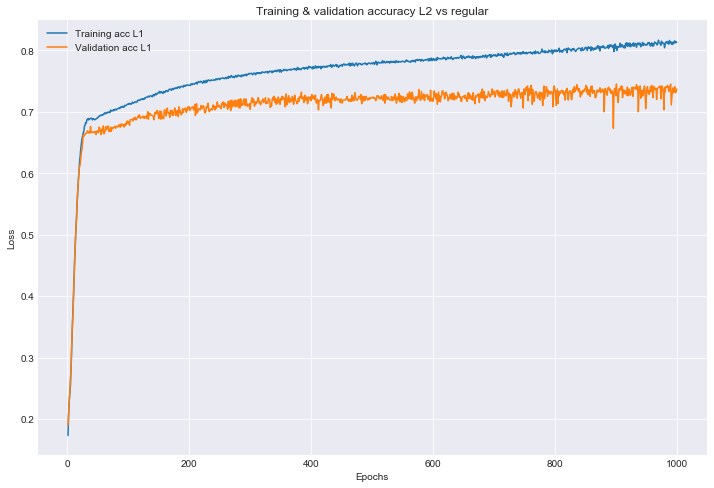

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

L1_model_dict = L1_model.history

acc_values = L1_model_dict['accuracy'] 
val_acc_values = L1_model_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc L1')
ax.plot(epochs, val_acc_values, label='Validation acc L1')
ax.set_title('Training & validation accuracy L2 vs regular')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

In [41]:
results_train = model.evaluate(X_train_tok, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

results_test = model.evaluate(X_test_tok, y_test_cat)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')   

219/219 [==============================] - 0s 1ms/step - loss: 0.8030 - accuracy: 0.8169
Training Loss: 0.803 Training Accuracy: 0.817
63/63 [==============================] - 0s 1ms/step - loss: 0.9029 - accuracy: 0.7730
Testing Loss: 0.903 Testing Accuracy: 0.773


This is about the best result you've achieved so far, but you were training for quite a while! Next, experiment with dropout regularization to see if it offers any advantages.

## Dropout Regularization

In [42]:
# ⏰ This cell may take about a minute to run
random.seed(123)
model = models.Sequential()
model.add(layers.Dropout(0.3, input_shape=(2000,)))
model.add(layers.Dense(50, activation='relu')) #2 hidden layers
model.add(layers.Dropout(0.3))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

dropout_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/200
28/28 [==============================] - 0s 12ms/step - loss: 1.9826 - accuracy: 0.1331 - val_loss: 1.9468 - val_accuracy: 0.1470
Epoch 2/200
28/28 [==============================] - 0s 8ms/step - loss: 1.9626 - accuracy: 0.1389 - val_loss: 1.9398 - val_accuracy: 0.1640
Epoch 3/200
28/28 [==============================] - 0s 8ms/step - loss: 1.9496 - accuracy: 0.1484 - val_loss: 1.9348 - val_accuracy: 0.1860
Epoch 4/200
28/28 [==============================] - 0s 8ms/step - loss: 1.9464 - accuracy: 0.1589 - val_loss: 1.9304 - val_accuracy: 0.1960
Epoch 5/200
28/28 [==============================] - 0s 8ms/step - loss: 1.9381 - accuracy: 0.1637 - val_loss: 1.9267 - val_accuracy: 0.2110
Epoch 6/200
28/28 [==============================] - 0s 8ms/step - loss: 1.9342 - accuracy: 0.1730 - val_loss: 1.9230 - val_accuracy: 0.2130
Epoch 7/200
28/28 [==============================] - 0s 8ms/step - loss: 1.9300 - accuracy: 0.1846 - val_loss: 1.9192 - val_accuracy: 0.2210
Epoch 8/200


Epoch 59/200
28/28 [==============================] - 0s 7ms/step - loss: 1.4036 - accuracy: 0.4383 - val_loss: 1.2028 - val_accuracy: 0.6230
Epoch 60/200
28/28 [==============================] - 0s 7ms/step - loss: 1.3848 - accuracy: 0.4584 - val_loss: 1.1891 - val_accuracy: 0.6310
Epoch 61/200
28/28 [==============================] - 0s 7ms/step - loss: 1.3853 - accuracy: 0.4569 - val_loss: 1.1810 - val_accuracy: 0.6390
Epoch 62/200
28/28 [==============================] - 0s 7ms/step - loss: 1.3700 - accuracy: 0.4649 - val_loss: 1.1692 - val_accuracy: 0.6380
Epoch 63/200
28/28 [==============================] - 0s 7ms/step - loss: 1.3537 - accuracy: 0.4669 - val_loss: 1.1596 - val_accuracy: 0.6420
Epoch 64/200
28/28 [==============================] - 0s 7ms/step - loss: 1.3442 - accuracy: 0.4770 - val_loss: 1.1475 - val_accuracy: 0.6440
Epoch 65/200
28/28 [==============================] - 0s 8ms/step - loss: 1.3423 - accuracy: 0.4783 - val_loss: 1.1374 - val_accuracy: 0.6470
Epoch 

28/28 [==============================] - 0s 8ms/step - loss: 1.0490 - accuracy: 0.5997 - val_loss: 0.8433 - val_accuracy: 0.7120
Epoch 117/200
28/28 [==============================] - 0s 7ms/step - loss: 1.0560 - accuracy: 0.6069 - val_loss: 0.8411 - val_accuracy: 0.7130
Epoch 118/200
28/28 [==============================] - 0s 7ms/step - loss: 1.0328 - accuracy: 0.6114 - val_loss: 0.8356 - val_accuracy: 0.7130
Epoch 119/200
28/28 [==============================] - 0s 7ms/step - loss: 1.0410 - accuracy: 0.6123 - val_loss: 0.8339 - val_accuracy: 0.7090
Epoch 120/200
28/28 [==============================] - 0s 7ms/step - loss: 1.0271 - accuracy: 0.6126 - val_loss: 0.8278 - val_accuracy: 0.7110
Epoch 121/200
28/28 [==============================] - 0s 7ms/step - loss: 1.0427 - accuracy: 0.6019 - val_loss: 0.8268 - val_accuracy: 0.7130
Epoch 122/200
28/28 [==============================] - 0s 7ms/step - loss: 1.0480 - accuracy: 0.6056 - val_loss: 0.8264 - val_accuracy: 0.7170
Epoch 123/200

28/28 [==============================] - 0s 8ms/step - loss: 0.8827 - accuracy: 0.6766 - val_loss: 0.7081 - val_accuracy: 0.7290
Epoch 174/200
28/28 [==============================] - 0s 8ms/step - loss: 0.8914 - accuracy: 0.6666 - val_loss: 0.7065 - val_accuracy: 0.7290
Epoch 175/200
28/28 [==============================] - 0s 8ms/step - loss: 0.8612 - accuracy: 0.6834 - val_loss: 0.7064 - val_accuracy: 0.7260
Epoch 176/200
28/28 [==============================] - 0s 8ms/step - loss: 0.8809 - accuracy: 0.6754 - val_loss: 0.7039 - val_accuracy: 0.7270
Epoch 177/200
28/28 [==============================] - 0s 7ms/step - loss: 0.8698 - accuracy: 0.6743 - val_loss: 0.7025 - val_accuracy: 0.7310
Epoch 178/200
28/28 [==============================] - 0s 7ms/step - loss: 0.8740 - accuracy: 0.6751 - val_loss: 0.7012 - val_accuracy: 0.7270
Epoch 179/200
28/28 [==============================] - 0s 8ms/step - loss: 0.8605 - accuracy: 0.6830 - val_loss: 0.6998 - val_accuracy: 0.7260
Epoch 180/200

In [43]:
results_train = model.evaluate(X_train_tok, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

results_test = model.evaluate(X_test_tok, y_test_cat)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')   

219/219 [==============================] - 0s 904us/step - loss: 0.5311 - accuracy: 0.8159
Training Loss: 0.531 Training Accuracy: 0.816
63/63 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.7640
Testing Loss: 0.631 Testing Accuracy: 0.764


You can see here that the validation performance has improved again! The variance did become higher again compared to L1-regularization.

## Bigger Data?

In the lecture, one of the solutions to high variance was just getting more data. You actually *have* more data, but took a subset of 10,000 units before. Let's now quadruple your data set, and see what happens. Note that you are really just lucky here, and getting more data isn't always possible, but this is a useful exercise in order to understand the power of big data sets.

In [44]:
df = pd.read_csv('Bank_complaints.csv')
df = df.sample(40000, random_state=123)

X = df["Consumer complaint narrative"]
y = df["Product"]

# train test split
X_train_lrg, X_test_lrg, y_train_lrg, y_test_lrg = train_test_split(X, y, random_state=42)

#Validation set
X_train_final_lrg, X_val_lrg, y_train_final_lrg, y_val_lrg = train_test_split(X_train_lrg, y_train_lrg, random_state=123)


#one-hot encoding of the complaints
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final_lrg)

X_train_tok_lrg = tokenizer.texts_to_matrix(X_train_final_lrg, mode='binary')
X_val_lrg = tokenizer.texts_to_matrix(X_val_lrg, mode='binary')
X_test_lrg = tokenizer.texts_to_matrix(X_test_lrg, mode='binary')

#one-hot encoding of products
lb = LabelBinarizer()
lb.fit(y_train_final_lrg)

y_train_lb_lrg = to_categorical(lb.transform(y_train_final_lrg))[:, :, 1]
y_val_lrg = to_categorical(lb.transform(y_val_lrg))[:, :, 1]
y_test_lrg = to_categorical(lb.transform(y_test_lrg))[:, :, 1]

In [45]:
# ⏰ This cell may take several minutes to run
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

moredata_model = model.fit(X_train_tok_lrg,
                    y_train_lb_lrg,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val_lrg, y_val_lrg))

Epoch 1/120
88/88 [==============================] - 1s 6ms/step - loss: 1.9272 - accuracy: 0.1868 - val_loss: 1.9028 - val_accuracy: 0.2399
Epoch 2/120
88/88 [==============================] - 0s 4ms/step - loss: 1.8742 - accuracy: 0.2719 - val_loss: 1.8415 - val_accuracy: 0.3109
Epoch 3/120
88/88 [==============================] - 0s 4ms/step - loss: 1.7938 - accuracy: 0.3574 - val_loss: 1.7411 - val_accuracy: 0.3995
Epoch 4/120
88/88 [==============================] - 0s 4ms/step - loss: 1.6731 - accuracy: 0.4470 - val_loss: 1.6021 - val_accuracy: 0.4807
Epoch 5/120
88/88 [==============================] - 0s 5ms/step - loss: 1.5243 - accuracy: 0.5248 - val_loss: 1.4473 - val_accuracy: 0.5464
Epoch 6/120
88/88 [==============================] - 0s 5ms/step - loss: 1.3721 - accuracy: 0.5832 - val_loss: 1.3005 - val_accuracy: 0.6040
Epoch 7/120
88/88 [==============================] - 0s 4ms/step - loss: 1.2337 - accuracy: 0.6277 - val_loss: 1.1722 - val_accuracy: 0.6412
Epoch 8/120
8

Epoch 59/120
88/88 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.8560 - val_loss: 0.5721 - val_accuracy: 0.7947
Epoch 60/120
88/88 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8571 - val_loss: 0.5726 - val_accuracy: 0.7928
Epoch 61/120
88/88 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8567 - val_loss: 0.5715 - val_accuracy: 0.7940
Epoch 62/120
88/88 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.8609 - val_loss: 0.5706 - val_accuracy: 0.7955
Epoch 63/120
88/88 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.8601 - val_loss: 0.5719 - val_accuracy: 0.7956
Epoch 64/120
88/88 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.8616 - val_loss: 0.5717 - val_accuracy: 0.7936
Epoch 65/120
88/88 [==============================] - 0s 4ms/step - loss: 0.3965 - accuracy: 0.8630 - val_loss: 0.5717 - val_accuracy: 0.7957
Epoch 

88/88 [==============================] - 0s 4ms/step - loss: 0.2974 - accuracy: 0.9012 - val_loss: 0.6095 - val_accuracy: 0.7968
Epoch 117/120
88/88 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.9004 - val_loss: 0.6116 - val_accuracy: 0.7948
Epoch 118/120
88/88 [==============================] - 0s 4ms/step - loss: 0.2944 - accuracy: 0.9022 - val_loss: 0.6141 - val_accuracy: 0.7955
Epoch 119/120
88/88 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.9018 - val_loss: 0.6117 - val_accuracy: 0.7949
Epoch 120/120
88/88 [==============================] - 0s 4ms/step - loss: 0.2916 - accuracy: 0.9024 - val_loss: 0.6137 - val_accuracy: 0.7951


In [46]:
results_train = model.evaluate(X_train_tok_lrg, y_train_lb_lrg)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

results_test = model.evaluate(X_test_lrg, y_test_lrg)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')

704/704 [==============================] - 1s 967us/step - loss: 0.2869 - accuracy: 0.9055
Training Loss: 0.287 Training Accuracy: 0.905
313/313 [==============================] - 0s 976us/step - loss: 0.6074 - accuracy: 0.7914
Testing Loss: 0.607 Testing Accuracy: 0.791


With the same amount of epochs, you were able to get a fairly similar validation accuracy of 89.67 (compared to 88.45 in obtained in the first model in this lab). Your test set accuracy went up from 75.8 to 79.2% though, without any other regularization technique. You can still consider early stopping, L1, L2 and dropout here. It's clear that having more data has a strong impact on model performance!

## Additional Resources

* https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb
* https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
* https://catalog.data.gov/dataset/consumer-complaint-database

## Summary  

In this lesson, you not only built an initial deep-learning model, you then used a validation set to tune your model using various types of regularization.